In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime , timedelta
import seaborn as sns

In [29]:
data = pd.read_csv('F:\\python py\\pandas\\project\\SBINDATA.csv')
data.head()
data.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

In [3]:
p  = data.dropna()
p.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2008-08-29,133.600006,140.979996,133.600006,140.384995,48.670589,26616360.0
1,2008-09-01,139.000000,143.470001,136.100006,141.559998,49.077950,16822410.0
2,2008-09-02,142.000000,154.800003,142.000000,152.300003,52.801445,32085130.0
3,2008-09-04,150.009995,154.669998,146.145004,153.470001,53.207069,25526720.0
4,2008-09-05,151.149994,153.720001,147.000000,151.985001,52.692234,27862810.0


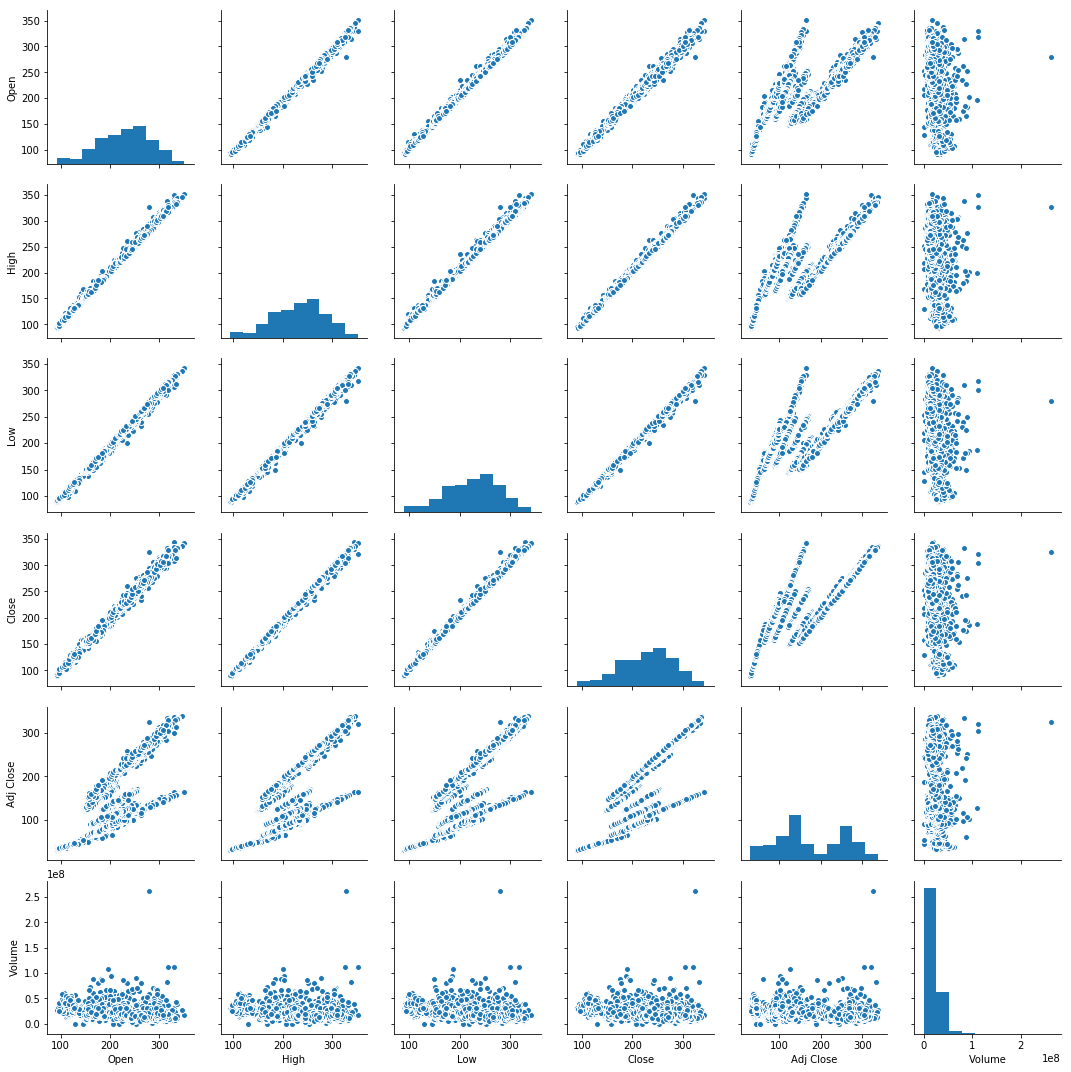

In [4]:
sns.pairplot(p)

In [5]:
dt = p['Date'].values
dt

array(['2008-08-29', '2008-09-01', '2008-09-02', ..., '2018-08-24',
       '2018-08-27', '2018-08-28'], dtype=object)

In [6]:
dt.astype('datetime64[D]').dtype

dtype('<M8[D]')

In [7]:
p['Date']=dt.astype('datetime64[D]').astype(int)
p.head()

F:\SetUp\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Date,Open,High,Low,Close,Adj Close,Volume
0,14120,133.600006,140.979996,133.600006,140.384995,48.670589,26616360.0
1,14123,139.000000,143.470001,136.100006,141.559998,49.077950,16822410.0
2,14124,142.000000,154.800003,142.000000,152.300003,52.801445,32085130.0
3,14126,150.009995,154.669998,146.145004,153.470001,53.207069,25526720.0
4,14127,151.149994,153.720001,147.000000,151.985001,52.692234,27862810.0


In [8]:
p['Date'].values

array([14120, 14123, 14124, ..., 17767, 17770, 17771])

In [9]:
p.dtypes

Date           int32
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

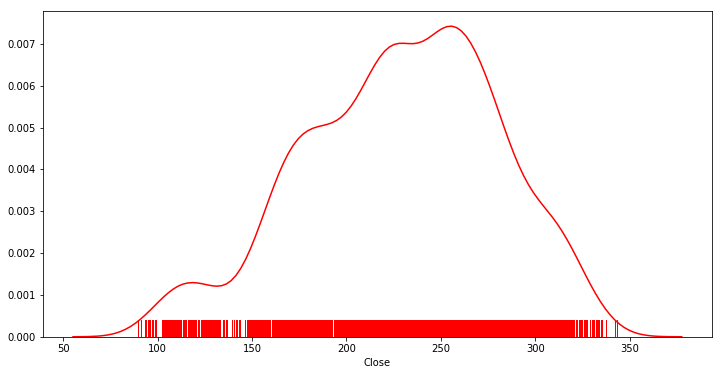

In [10]:
plt.figure(figsize=(12,6))
sns.distplot(p['Close'], color='red',hist=False,rug=True)

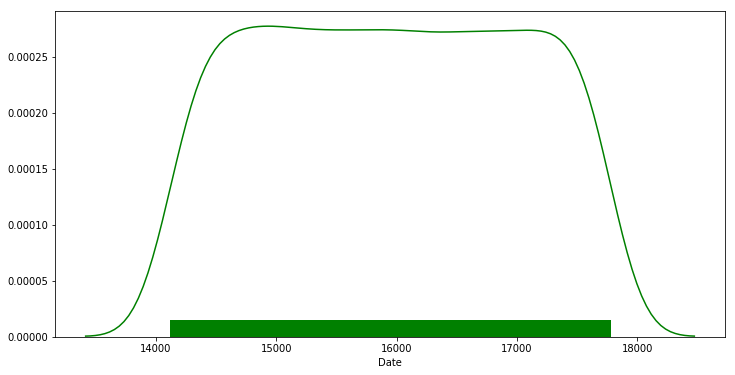

In [11]:
plt.figure(figsize=(12,6))
sns.distplot(p['Date'],color='green',hist=False,rug=True)

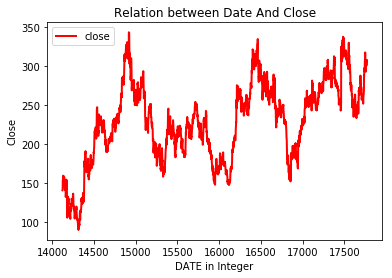

In [12]:
plt.plot(p['Date'],p['Close'],color = 'r',lw = 2,label="close")
plt.xlabel('DATE in Integer')
plt.ylabel('Close')
plt.title('Relation between Date And Close')
plt.legend()
plt.show()

In [13]:
#predicting Closerate with help of the Dates

In [14]:
Date = np.array(p.Date)
Close = np.array(p.Close)
p.shape

(2460, 7)

In [15]:
x = Date.reshape(Date.shape[0],1).astype(int)
x

array([[14120],
       [14123],
       [14124],
       ...,
       [17767],
       [17770],
       [17771]])

In [16]:
y = Close.reshape(Date.shape[0],1)
y

array([[140.384995],
       [141.559998],
       [152.300003],
       ...,
       [300.450012],
       [308.      ],
       [305.350006]])

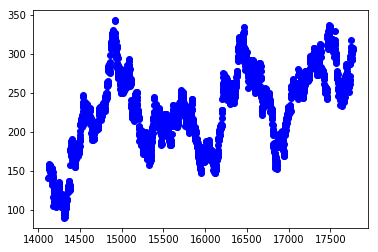

In [17]:
plt.scatter(x,y,color='blue')
plt.show()

In [18]:
from sklearn.cross_validation import train_test_split

F:\SetUp\Anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [19]:
x_train ,x_test, y_train ,y_test = train_test_split(x,y,random_state = 0)

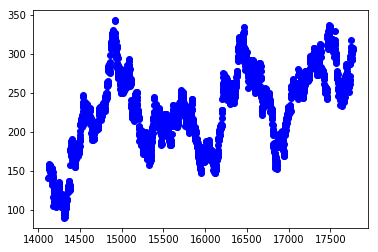

In [20]:
plt.scatter(x,y,color='blue')
plt.show()

In [21]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [22]:
print('R-squared score (training): {}'.format(reg.score(x_train, y_train)))
print('R-squared score (test): {}'.format(reg.score(x_test, y_test)))

R-squared score (training): 0.28126735065906117
R-squared score (test): 0.2694574927502411


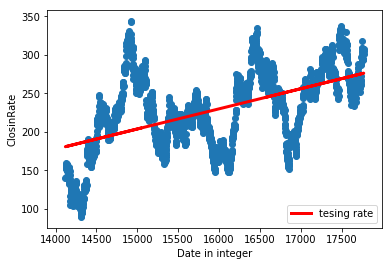

In [23]:
plt.plot(x_train,reg.predict(x_train),color='red',linewidth=3,label = 'tesing rate')
plt.scatter(x,y)
plt.xlabel('Date in integer')
plt.ylabel('ClosinRate')
plt.legend()
plt.show()

In [35]:
import time
import datetime
Dates = ['2018-08-30','2018-08-31','2018-08-01','2018-08-02','2018-08-03']
#Dates = pd.read_csv('F:\\python py\\pandas\\project\\Dates.csv')
#Bro i need help here how to do with help of the csv file
i=0
for das in Dates:
    i += 1
    s = das
    temp_date = time.mktime(datetime.datetime.strptime(s, "%Y-%m-%d").timetuple())/86400 
                        #this is is divided by the second of the full day because  date will convert to time and agin to the day 
    

    df = pd.DataFrame({'Date': [temp_date]})

    predicted_Closed =reg.predict(df)
    print('predicted_Closed :',predicted_Closed,"This an ApproxMate","Day",i)

predicted_Closed : [[276.10297902]] This an ApproxMate Day 1
predicted_Closed : [[276.12912995]] This an ApproxMate Day 2
predicted_Closed : [[275.34460206]] This an ApproxMate Day 3
predicted_Closed : [[275.37075299]] This an ApproxMate Day 4
predicted_Closed : [[275.39690392]] This an ApproxMate Day 5
